
<font size='5'> Confronting alternative `ΛCDM` models against cosmological observations </font>







  * The `ΛCDM` model, also known as the Lambda Cold Dark Matter model, is a widely accepted cosmological model that describes the composition and evolution of the universe. It is based on two main components: dark energy (represented by Lambda, Λ) and cold dark matter (CDM). In this model, the universe is assumed to be homogeneous and isotropic on large scales, following the principles of the Friedmann-Lemaître-Robertson-Walker (FLRW) metric.

* The `ΛCDM` model assumes that the total energy density of the universe consists of several components. The first component is ordinary matter, which includes baryonic matter (such as protons and neutrons) and radiation (such as photons). The second component is dark matter, which is a hypothetical form of matter that does not interact electromagnetically but has gravitational effects. The third component is dark energy, which is a form of energy that permeates all of space and is responsible for the observed accelerated expansion of the universe.


``Importing the necessary libraries``

In [40]:
# Importing Libarries
import numpy as np
import matplotlib 
import scipy
import pandas as pd
import math
import scipy.integrate as intg
import scipy.constants as const
import matplotlib.pyplot as plt
import emcee
from scipy.integrate import trapz

* The class called `LCDM` that encapsulates these calculations. The class is initialized with the cosmological parameters `H0`, `Omega_m`, and `Omega_lambda`. The hubble_function method takes a redshift value and returns the corresponding Hubble function value. The luminosity_distance method takes an array of redshifts and returns an array of luminosity distance values. The angular_diameter_distance method performs a similar operation to calculate the angular diameter distances.

In [41]:
H0=73.8
omega_m=.3
parameters=[H0,omega_m]

class LCDM:
    def __init__(self, parameters):
        self.H0 = parameters[0]
        self.omega_M = parameters[1]
        self.omega_L = 1-parameters[1]

#Hubble function 
    def hubble_function(self, z):
       hubble_function = (self.H0 )*self.E(z)
       return hubble_function    
    def E(self,z):
        return np.sqrt(self.omega_M * (1+z)**3 + self.omega_L)
    def E_recp(self, z):
        return 1/self.E(z)
#comoving distance
    def Comoving_Distance(self,z):
        return (1e-3*const.c/self.H0) * np.array([intg.quad(self.E_recp, 0, x)[0] for x in z])
#lumonosity Distance
    def luminosity_distance(self, z):
        return (1+z) * self.Comoving_Distance(z)   
    def pc(self,z):
        return 10*3.0857*10**16

**Hubble Function:**

The Hubble function, denoted as $H(z)$, describes the rate of expansion of the universe as a function of redshift ($z$). It is defined as the ratio of the rate of change of the scale factor ($a$) to the scale factor itself. In the LCDM model, the Hubble function depends on the redshift and the cosmological parameters $H_0$ (the present-day value of the Hubble constant), $\Omega_m$ (the present-day matter density parameter), and $\Omega_\Lambda$ (the present-day dark energy density parameter). The Hubble function is calculated using the equation 

$$E(z) = \sqrt{\Omega_m \cdot (1 + z)^3 + \Omega_\Lambda}$$

$$E(z)≡H(z)/H0$$ 

, where $E(z)$ is a dimensionless quantity.





**Luminosity Distance:**

The luminosity distance, denoted as $D_{L}$, is defined as the distance at which an object would have the same observed luminosity as it has at its source. In an expanding universe, the observed flux from a source decreases due to the stretching of photons' wavelengths.

**Angular Diameter Distance:**

The angular diameter distance, denoted as $D_A$, is a measure of the physical size of an object on the sky. It is defined as the ratio of the physical size of the object to its angular size. In the `ΛCDM` model, the angular diameter distance depends on the redshift and the cosmological parameters.


The comoving distance, denoted as $D_{C}$, represents the proper distance between two points in an expanding universe, taking into account the expansion of space. It is related to the redshift of light emitted by distant objects.

To derive the luminosity distance law, we consider the relationship between the comoving distance and the luminosity distance, assuming a flat Friedmann-Lemaître-Robertson-Walker (FLRW) cosmology. In this cosmological model, the metric of space is given by:

$$[ ds^2 = -dt^2 + a(t)^2 [dr^2 / (1 - kr^2) + r^2 (dθ^2 + sin^2θ dφ^2)] ]$$

where a(t) is the scale factor representing the expansion of the universe, t is the cosmic time, r is the comoving radial coordinate,$\theta$ and $\phi$ are angular coordinates, and k is the curvature of space.

The comoving distance is given by integrating the line element along a radial path:

Let us first compute the comoving distance $D_{c}$. The light traveling along the $\chi$ direction satisfies the geodesic equation: 


$$ds^2 = -c^2 dt^2 + a^2(t) d\chi^2 = 0$$


where we have recovered the speed of light $c$ for clarification. Let us consider the case in which light emitted at time $t=t_{1}$ with $\chi = \chi_{1}$ (redshift $z$) reaches an observer at time $t=t_{0}$ with $\chi = 0$(corresponding to z = 0. Integrating the equation, $\chi = -c  dt/a(t)$,
 the comoving distance reads 

$$D_c \equiv \chi_1 = \int_{\chi_1}^0 d\chi = -\int_{t_1}^{t_0} \frac{c}{a(t)} dt$$


It follows that $dt = -\frac{dz}{H(1+z)}$. Then the comoving distance is given by 
$$D_{c} = \frac{c a_0}{H_0} \int_0^z \frac{d\tilde{z}}{E(\tilde{z})}$$


Where : $E(z)≡H(z)/H0$

To relate the comoving distance to the luminosity distance, we consider the propagation of light in an expanding universe. The observed wavelength of light,$\lambda_{obs}$ is related to the emitted wavelength, $\lambda_{em}$, by:

$$[ \frac{\lambda_{obs}}{\lambda_{em}} = \frac{a_0}{a_e} (1 + z) ]$$

where $a_{0}$ is the scale factor at the present time, $a_{e}$ is the scale factor at the time of emission, and z is the redshift. Assuming a small redshift (z << 1), we can approximate the above equation as:

$$[ 1 + z ≈ \frac{a_0}{a_e} ]$$

Now, we can relate the comoving distance to the luminosity distance.

$$[ D_L = D_C (1 + z) ]$$

Substituting the expression for $D_{C}$, we obtain:

$$[ D_L = (1 + z) \frac{c a_0}{H_0} \int_0^z \frac{d\tilde{z}}{E(\tilde{z})}]$$

This is the luminosity distance law derived from the comoving distance.





#### `Reading The data`
 Reading the data file of the observed supernova data in a data frame, and displaying it.

In [42]:
df= pd.read_csv('mB_observ1.txt', delim_whitespace=True,header=None)
headers=["z","m","segma"]
df.columns=headers

Getting the observed distance modulus by subtracting the absolute magnitude (fixed at `M = -19.3`) from apparent magnitude given in the data set.

In [43]:
#Calculating the observed mu
M=-19.3
dist_mod_obs=df["m"]-M

The code defines an instance of the LCDM class with specific `ΛCDM model` parameters. It then calculates the theoretical distance moduli (dist_mod_theoretical) for redshift values extracted from a DataFrame using the ΛCDM model. The distance moduli are computed by converting luminosity distances to apparent magnitudes using the formula $$\mu = 5 * log10(D_L) + 25.$$

In [44]:
#calculating the theoritical distance modulus
def calculate_distance_modulus(z):
 # Calculate the distance moduli
    luminosity_distance=LCDM(parameters).luminosity_distance(df["z"])
    D_L =luminosity_distance
    mu = 5 * np.log10(D_L) + 25
    return mu
dist_mod_theoritical=calculate_distance_modulus(df["z"])

##### `Plotting the data points to know the guess distribution`

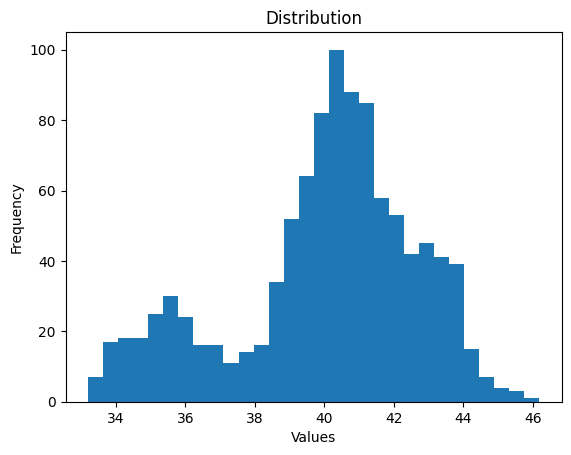

In [45]:
# Plotting the histogram
plt.hist(dist_mod_obs, bins=30, edgecolor=None)
# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution')
# Displaying the plot
plt.show()

This distribution of the data proposes that the distrubution to be used in the likelhood is a normal (Gaussian Distribution)

## `Likelhood Analysis`

### Likelihood Function:

The likelihood function represents the probability of observing the data given the model parameters. For the case of Gaussian uncertainties, the likelihood function can be expressed as:

$$\mathcal{L}(\theta) = \prod_{i=1}^n \frac{1}{\sqrt{2\pi}\sigma_i} \exp \left( -\frac{1}{2\sigma_i^2} (\mu_{\text{obs}, i} - \mu_{\text{th}, i})^2 \right)
$$

Where:

* $\theta$ represents the parameter values you want to estimate.
* $n$ is the number of data points.
* $\mu_{\text{obs}, i}$ is the observed distance modulus for the $i$-th data point.
* $\mu_{\text{th}, i}$ is the theoretical distance modulus for the $i$-th data point based on the model.
* $\sigma_i$ is the uncertainty associated with the observed distance modulus for the $i$-th data point.

### Log-Likelihood:

Working with the logarithm of the likelihood function, known as the log-likelihood, can be more numerically stable:

$$\ln \mathcal{L}(\theta) = -\frac{1}{2} \sum_{i=1}^n \left[ (\mu_{\text{obs}, i} - \mu_{\text{th}, i})^2 + \ln(2\pi\sigma_i^2) \right]$$


* Maximizing Likelihood

The concept of Maximum Likelihood Estimation (MLE) is a fundamental approach in statistical inference. It aims to determine the set of parameters that maximizes the likelihood function based on the observed data. The likelihood function quantifies the probability of observing the given data under a particular set of parameters. However, in many cases, finding the exact analytical solution for the maximum likelihood estimates can be challenging or even infeasible.

* Bayesian Perspective

Bayesian statistics presents a different viewpoint, treating model parameters as random variables characterized by uncertainty. In this framework, the objective is to derive the posterior distribution of the parameters given the observed data. This posterior distribution merges our prior beliefs (expressed through a prior distribution) about the parameters with the likelihood of observing the data under those parameters.

* Bayes' Theorem

At the core of Bayesian statistics is Bayes' theorem, which establishes a connection between the prior distribution, the likelihood, and the posterior distribution:

$$P(parameters|data) = \frac{P(data|parameters) \times P(parameters)}{P(data)}$$

Here:

* `P(parameters|data)` represents the posterior distribution of parameters given the observed data.
* `P(data|parameters)` is the likelihood, expressing the probability of observing the data under specific parameter values.
* `P(parameters)` stands for the prior distribution, encapsulating our initial beliefs about the parameters before considering the observed data.
* `P(data)` is the marginal likelihood, serving as a normalizing constant to ensure that the posterior distribution is a valid probability distribution.

In essence, Bayes' theorem encapsulates the core idea of Bayesian statistics: updating our beliefs (the prior) about model parameters based on the observed data (the likelihood) to obtain a more informed and data-driven estimate (the posterior).

The Bayesian framework allows us to incorporate prior knowledge and uncertainties into the estimation process, providing a flexible and powerful way to make inferences about model parameters even in cases where likelihood-based methods might face limitations.


The $\chi^{2}$ function calculates the Chi-Square value by comparing the observed distance moduli with the predicted distance moduli based on the model. The squared differences are weighted by the squared uncertainties and summed.



`Parameter Estimation:`

To find the best-fit parameter values, the goal is to maximize the likelihood function (or equivalently, the log-likelihood). This can be achieved using optimization techniques or MCMC methods. Optimization methods iteratively adjust the parameters to find the maximum of the likelihood function.

`Interpretation:`

The parameter values that maximize the likelihood function represent the best-fit parameters for the model given the observed data. The spread of parameter values in the likelihood function provides insights into the uncertainties of the parameter estimates.

### `Using MCMC`

Markov Chain Monte Carlo (MCMC) is a powerful numerical technique used to sample from complex probability distributions, particularly the posterior distribution. In MCMC, a Markov chain is constructed, where each step depends on the previous step. By running the chain for a sufficiently long time, the generated samples approximate the desired distribution, even when analytical solutions are not feasible.

#### `Transition to MCMC`

The shift from traditional Maximum Likelihood Estimation (MLE) to MCMC arises from a change in focus. Rather than seeking single point estimates, such as MLE, MCMC allows us to explore and comprehend the entire distribution of parameter values. This technique enables sampling from the posterior distribution, providing estimates for parameters alongside their uncertainties.

This transition is motivated by the understanding that complex scenarios often involve significant uncertainty in parameter values. MCMC addresses this issue by generating a collection of parameter samples that collectively represent the posterior distribution.

#### `Implementation Details`

To delve into the implementation of MCMC, let's describe it:

- **log_likelihood Function:** The `log_likelihood` function calculates the likelihood based on observed data. It quantifies the probability of observing the given data under specific parameter values, playing a key role in Bayesian statistics.

- **log_prior Function:** The `log_prior` function encodes prior beliefs about parameters. It allows us to incorporate existing knowledge or assumptions about parameter values before considering the data, shaping the posterior distribution.

- **log_probability Function:** The `log_probability` function combines likelihood and prior to generate the log-posterior distribution. This distribution reflects updated beliefs about parameter values based on both observed data and prior knowledge.

- **MCMC Sampler Setup:** The code sets up an MCMC sampler using the `emcee` library. This sampler explores the parameter space and generates samples that mirror the posterior distribution. The number of walkers and steps determines exploration accuracy.

- **Parameter Estimation:** After running the MCMC sampler, the obtained samples enable parameter estimation. Analyzing the distribution of samples offers insights into likely parameter values and their uncertainties.

- **Posterior Analysis:** Resulting parameter estimates, like `H0`, `Omega_M`, and `Omega_Lambda`, offer valuable information about the model. The posterior distribution captures likely values and the range of possible values for each parameter.

Through the interplay of likelihood, prior beliefs, and MCMC sampling, we transition to a more comprehensive inference framework. This framework embraces uncertainty and provides a deeper understanding of the model's behavior. This is particularly advantageous when analytical solutions are challenging to derive.


In [46]:
def chi_square(parameters):
    # Parameters: H0, Omega_m, Omega_lambda
    chi_square_values = np.sum((np.abs(dist_mod_obs - dist_mod_theoritical))**2 / df["segma"]**2)
    return chi_square_values

The likelihood function computes the likelihood value based on the Chi-Square value. Assuming Gaussian uncertainties, the likelihood is calculated as the exponential of the negative half of the $\chi^{2}$ value.

In [47]:
# Define the likelihood function (assuming Gaussian uncertainties)
def likelihood(parameters):
    chi_square_val = chi_square(parameters)
    likelihood_val = np.exp(-0.5 * chi_square_val)
    return likelihood_val

In cosmological parameter estimation using supernova data, the likelihood calculates how probable it is to observe the given distance moduli (​$\mu_{obs}$) of supernovae, based on the theoretical predictions (​$\mu_{the}$) derived from the distance-redshift relation and the current or proposed parameter values.

In [54]:


# Define observed data
observed_error = df["segma"]


log_likelihood_val=np.log(likelihood(parameters))

# Define the prior on parameters
def log_prior(parameters):
    H0, omega_M= parameters
    if 50.0 <= H0 <= 100.0 and 0.0 <= omega_M <= 1.0 and 0.0 <= (1-omega_M )<= 1.0:
        return 0.0
    return -np.inf

# Define the full log-probability function
def log_probability(parameters):
    prior = log_prior(parameters)
    if not np.isfinite(prior):
        return -np.inf
    
    return prior + log_likelihood_val

# Set up the emcee sampler
ndim = len(parameters)
nwalkers = 500
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability)

# Run the MCMC sampler
sampler.run_mcmc(np.random.randn(nwalkers, ndim) + parameters, 10000, progress=True)

# Get the samples after burn-in
samples = sampler.get_chain(discard=100, flat=True)

# Extract the parameter estimates
H0_fit, omega_M_fit= np.median(samples, axis=0)


omega_L_fit=1- omega_M_fit

print("Best-fit parameters:")
print("H0 =", H0_fit)
print("Omega_m =", omega_M_fit)
print("Omega_lambda =", omega_L_fit)


  0%|          | 0/10000 [00:00<?, ?it/s]

/home/miko/.local/lib/python3.10/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 10000/10000 [00:28<00:00, 349.70it/s]


Best-fit parameters:
H0 = 74.81096921613809
Omega_m = 0.4941200730183975
Omega_lambda = 0.5058799269816026


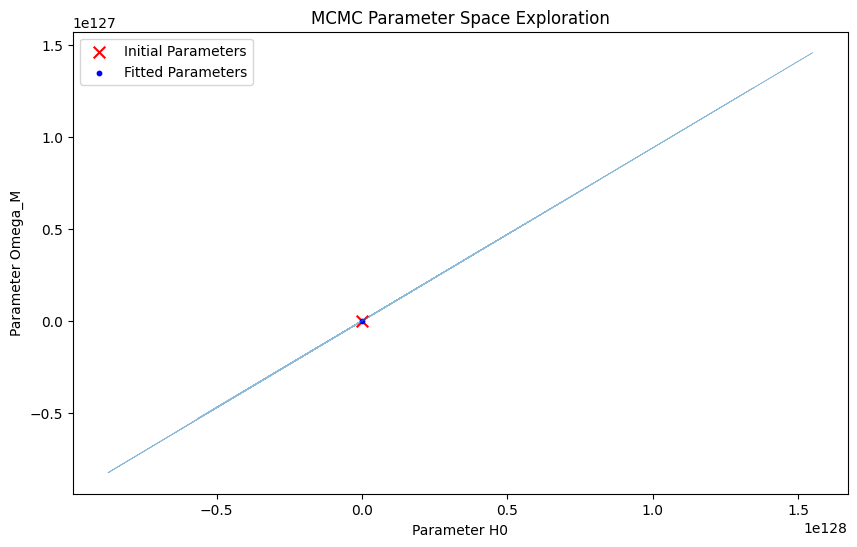

In [62]:
ndim = 2
nwalkers = 50

# Initialize walkers with random positions around initial parameters
initial_params = [70, 0.3]
init_positions = [initial_params + 1e-3 * np.random.randn(ndim) for _ in range(nwalkers)]

# Initialize the sampler
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability)

# Run the MCMC sampler
n_steps = 1000
sampler.run_mcmc(init_positions, n_steps)

# Get the chain and flatten it
chain = sampler.get_chain(flat=True)

# Plot the MCMC trace
plt.figure(figsize=(10, 6))
plt.plot(chain[:, 0], chain[:, 1], alpha=0.5, linewidth=0.5)
plt.scatter(initial_params[0], initial_params[1], color='red', marker='x', s=70, label='Initial Parameters')
plt.scatter(H0_fit, omega_M_fit, color='blue', marker='o', s=10, label='Fitted Parameters')
plt.xlabel('Parameter H0')
plt.ylabel('Parameter Omega_M')
plt.title('MCMC Parameter Space Exploration')
plt.legend()
plt.show()